In [1]:
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\91808\Downloads\Insurance\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df["cat_age"]=pd.cut(df["age"],bins=[0.0,20.0,30.0,40.0,50.0,np.inf],
                     labels=[1,2,3,4,5])

In [5]:
df["cat_age"]

0       1
1       1
2       2
3       3
4       3
       ..
1333    4
1334    1
1335    1
1336    2
1337    5
Name: cat_age, Length: 1338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [6]:
df.head(3)

,age,sex,bmi,children,smoker,region,expenses,cat_age
0,19,female,27.9,0,yes,southwest,16884.92,1
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,2


In [7]:
df["cat_age"].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<Axes: ylabel='Frequency'>

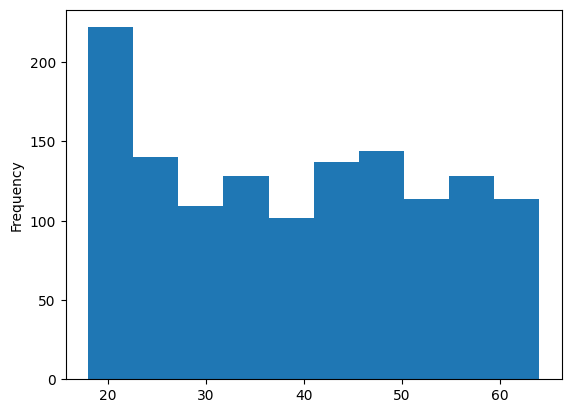

In [8]:
df["age"].plot(kind="hist")

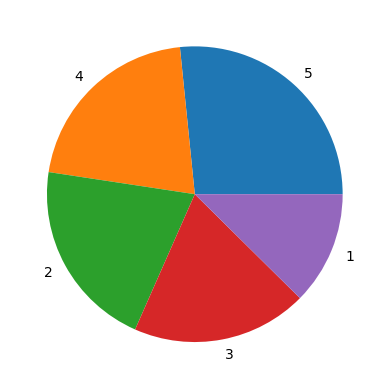

In [9]:
plt.pie(df.cat_age.value_counts(),labels=df.cat_age.value_counts().index)
plt.show()

In [10]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [11]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [12]:
df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [13]:
df["expenses"]=df["expenses"].astype("float64")
df["expenses"]

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [14]:
df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [15]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [16]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [17]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
cat_age     0
dtype: int64

In [19]:
corr=df.drop(["cat_age","sex","region","smoker"],axis=1).corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: >

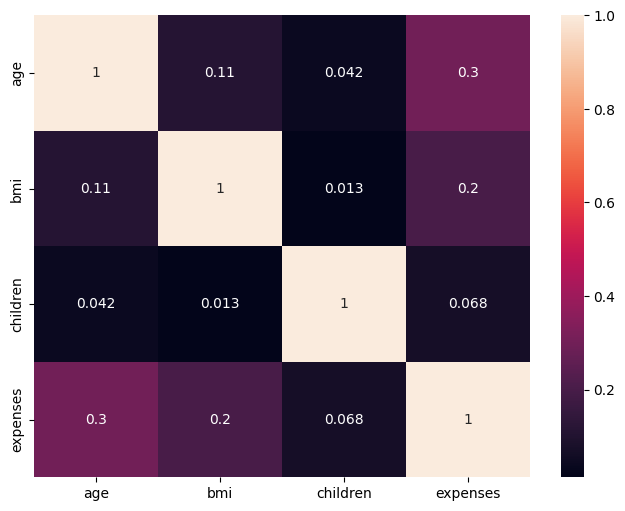

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)

<Axes: xlabel='bmi', ylabel='expenses'>

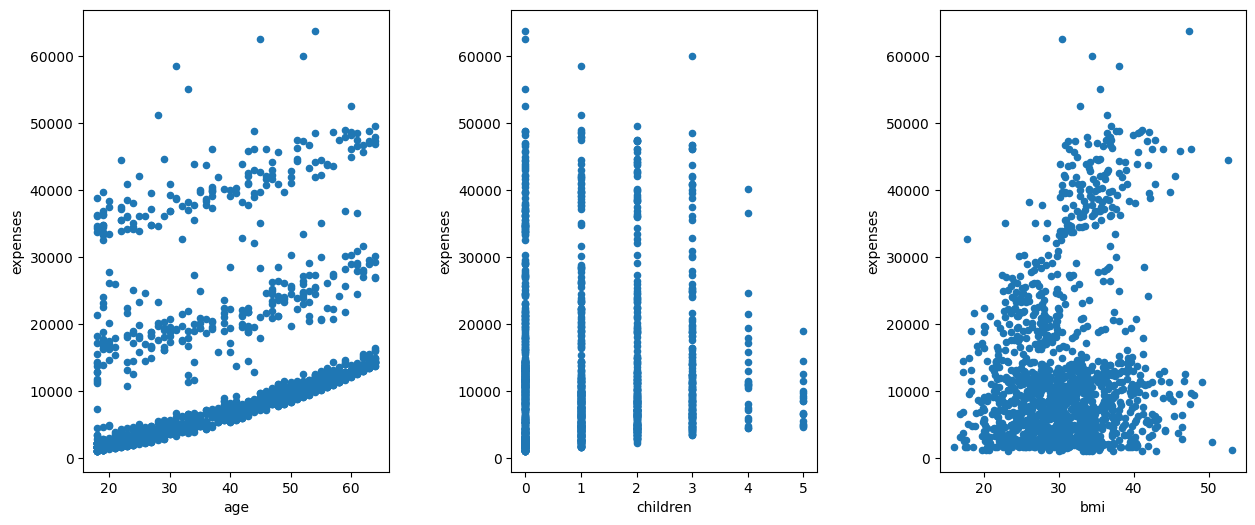

In [29]:
fig,axes=plt.subplots(ncols=3,figsize=(15,6),squeeze=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=None)
df.plot(kind='scatter',x='age',y='expenses',ax=axes[0])
df.plot(kind="scatter",x="children",y="expenses",ax=axes[1])
df.plot(kind="scatter",x="bmi",y="expenses",ax=axes[2])



<Axes: ylabel='Frequency'>

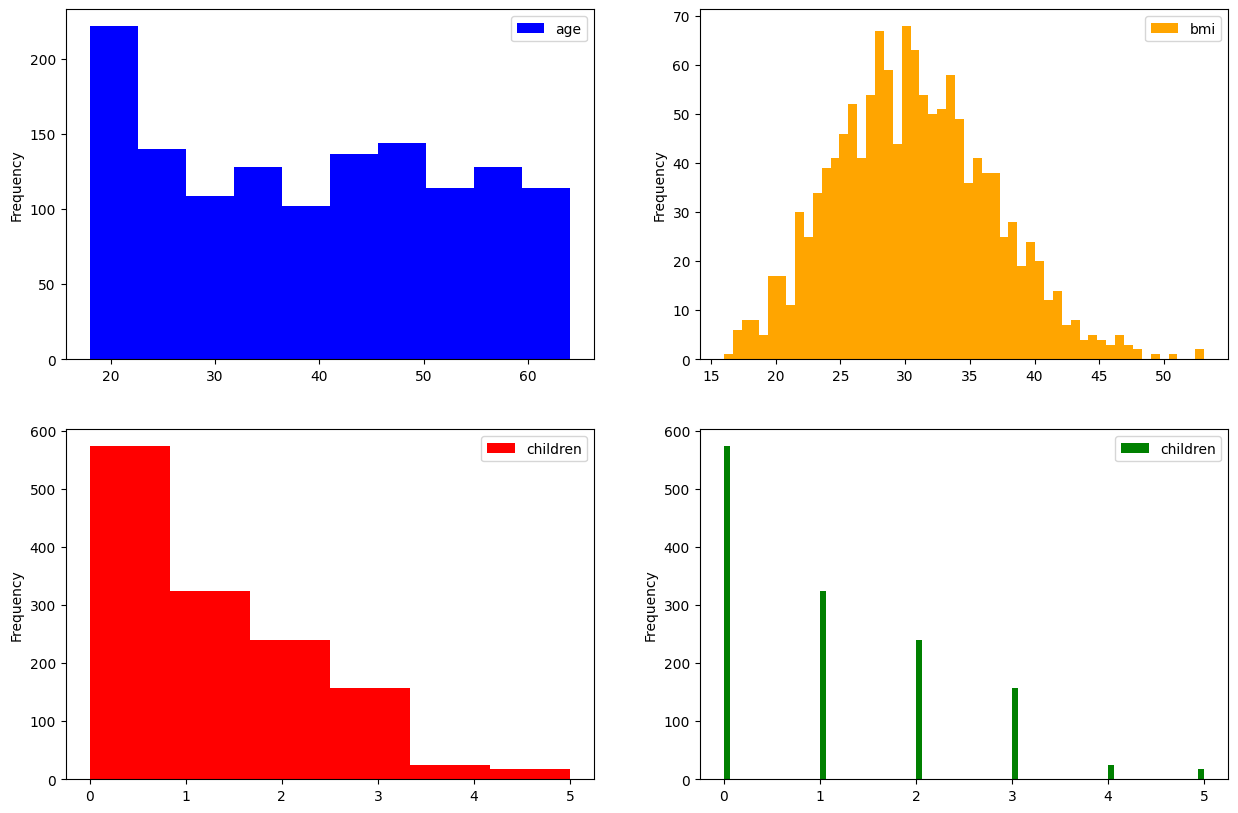

In [31]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
df.plot(kind="hist",y="age",ax=axes[0][0],color="blue")
df.plot(kind="hist",y="bmi",ax=axes[0][1],color="orange",bins=54)
df.plot(kind="hist",y="children",ax=axes[1][0],color="red",bins=6)
df.plot(kind="hist",y="children",ax=axes[1][1],color="green",bins=80)

<Axes: xlabel='bmi', ylabel='expenses'>

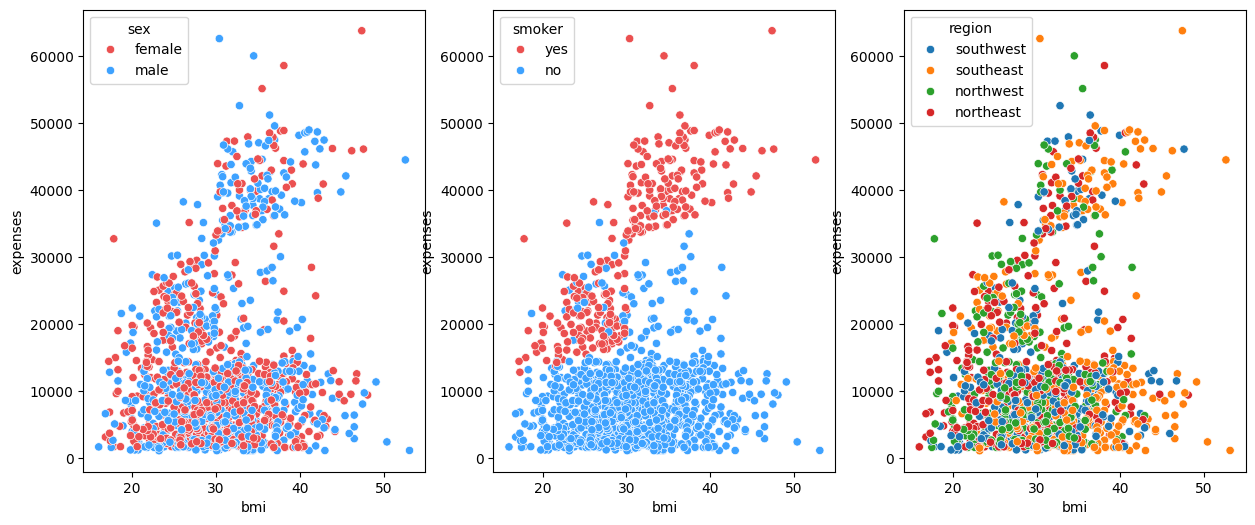

In [32]:
palette=["#EB5050","#3EA2FF"]
fig,axes=plt.subplots(ncols=3,figsize=(15,6),squeeze=True)
sns.scatterplot(x="bmi",y="expenses",ax=axes[0],data=df,hue="sex",palette=palette)
sns.scatterplot(x="bmi",y="expenses",ax=axes[1],data=df,hue="smoker",palette=palette)
sns.scatterplot(x="bmi",y="expenses",ax=axes[2],data=df,hue="region")

<Axes: title={'center': 'smoker'}, xlabel='smoker'>

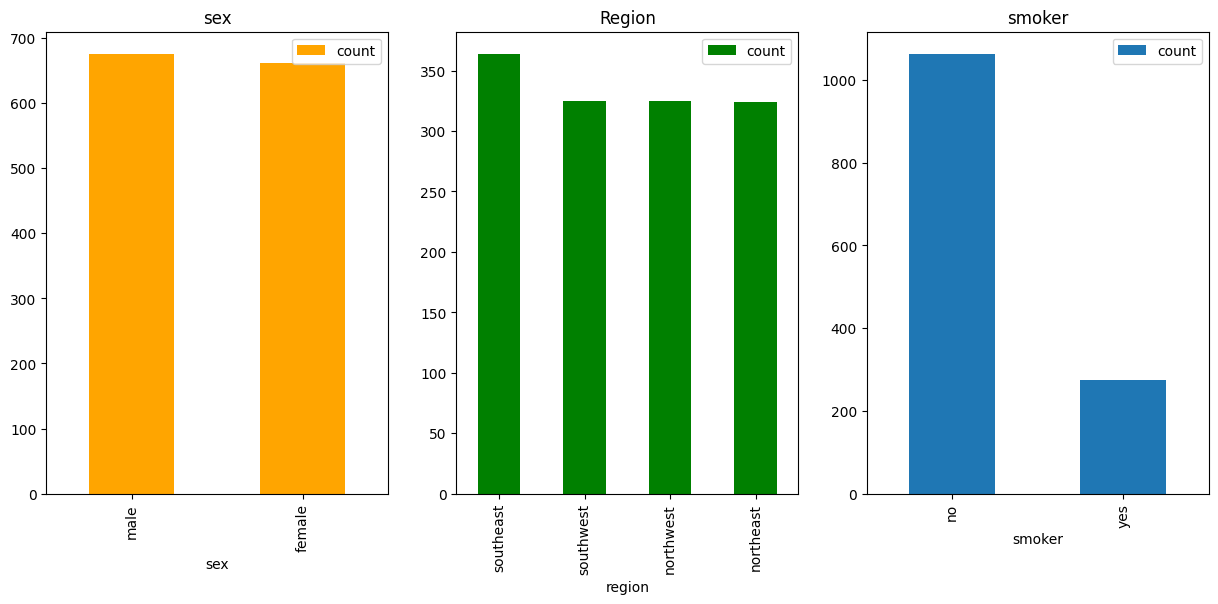

In [36]:
fig,axes=plt.subplots(ncols=3,figsize=(15,6))
df["sex"].value_counts().plot(kind="bar",color="orange",ax=axes[0],title="sex",legend="sex")
df["region"].value_counts().plot(kind="bar",color="green",ax=axes[1],title="Region",legend="region")
df["smoker"].value_counts().plot(kind="bar",ax=axes[2],title="smoker",legend="smoker")

C:\Users\91808\AppData\Local\Temp\ipykernel_27584\206181529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="sex",y="expenses",kind="violin",palette=palette,data=df)


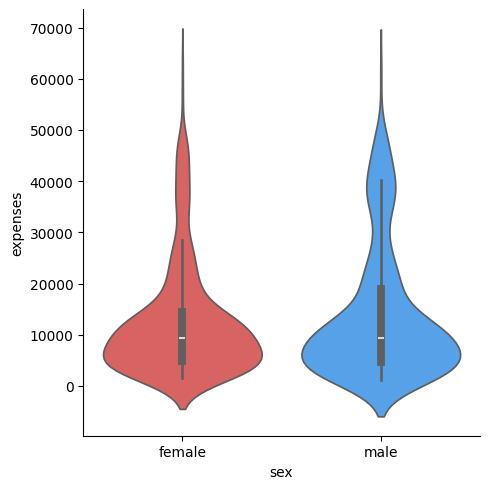

In [37]:
palette=["#EB5050","#3EA2FF"]
sns.catplot(x="sex",y="expenses",kind="violin",palette=palette,data=df)

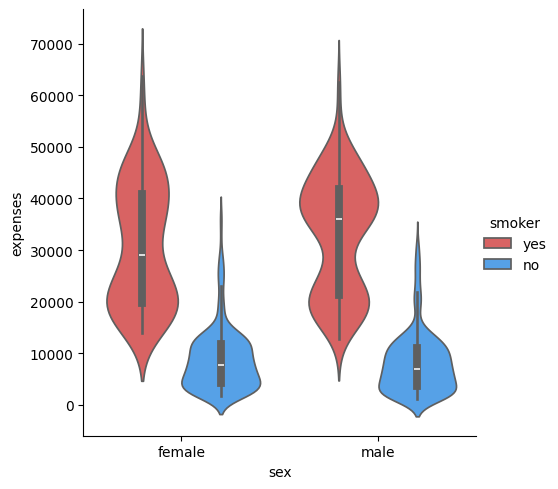

In [38]:
palette=["#EB5050","#3EA2FF"]
sns.catplot(x="sex",y="expenses",kind="violin",hue="smoker",palette=palette,data=df)


C:\Users\91808\AppData\Local\Temp\ipykernel_27584\3073313433.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["expenses"],fit=norm)


Text(0.5, 1.0, 'Distribution Of Charges')

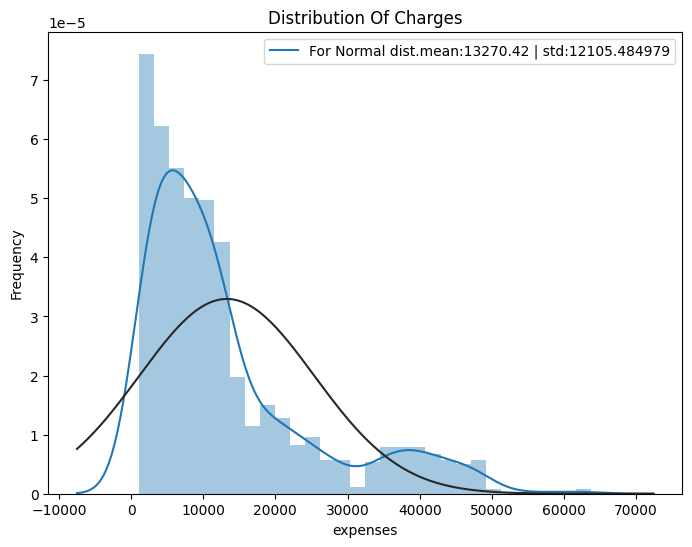

In [39]:
from scipy import stats
from scipy.stats import norm
fig=plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df["expenses"],fit=norm)
(mu,sigma)=norm.fit(df["expenses"])
plt.legend(["For Normal dist.mean:{:.2f} | std:{:2f}".format(mu,sigma)])
plt.ylabel("Frequency")
plt.title("Distribution Of Charges")